In [72]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [73]:
import random # Randomness

sd = 185
random.seed(sd) 
np.random.seed(sd)

'''
sd  = Acc, MF1, WF1
231 = 0.81, 0.78, 0.81
222 = 0.78, 0.76, 0.77
185 = 0.82, 0.80, 0.81
45 = 0.79, 0.78, 0.80
125 = 0.75, 0.77, 0.75
555 = 0.82, 0.78, 0.82
666 = 0.75, 0.74, 0.75
123 = 0.78, 0.76, 0.78
569 = 0.75, 0.79, 0.76
'''

'\nsd  = Acc, MF1, WF1\n231 = 0.81, 0.78, 0.81\n222 = 0.78, 0.76, 0.77\n185 = 0.82, 0.80, 0.81\n45 = 0.79, 0.78, 0.80\n125 = 0.75, 0.77, 0.75\n555 = 0.82, 0.78, 0.82\n666 = 0.75, 0.74, 0.75\n123 = 0.78, 0.76, 0.78\n569 = 0.75, 0.79, 0.76\n'

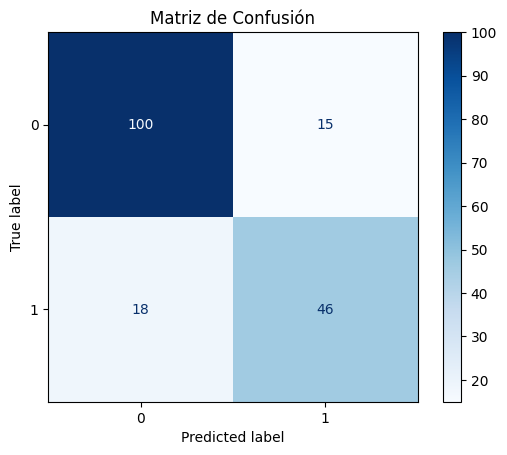

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       115
           1       0.75      0.72      0.74        64

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179



In [74]:
# Import datasets
df_X = pd.read_csv("dfx.csv") # Features
df_y = pd.read_csv("dfy.csv") # Targets

# colum bool -> int
for col in df_X.columns:
    if df_X[col].dtype == 'bool':
        df_X[col] = df_X[col].astype(int)

# Split datasets into train and test | 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Initializae and train Random Forest model
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy')
rfc.fit(X_train, y_train)

# Generate prediction
y_pred = rfc.predict(X_test) 

# Confusion matrix
cm = confusion_matrix(y_test["Survived"], y_pred[:, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

# Evaluation Metrics
print("Reporte de Clasificación:")
print(classification_report(y_test["Survived"], y_pred[:, 1]))
